# Explorative Datenanalyse : Products.csv

In [2]:
%pip install numpy
%pip install pandas
%pip install pyarrow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install Jinja2

# Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

# Import Data

In [5]:
products_source = pd.read_csv('data/products.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/products.csv'

In [ ]:
transaction_lines_test_source   = pd.read_parquet('data/transaction_lines_test_1.parquet')
transaction_lines_train_source  = pd.read_parquet('data/transaction_lines_train_1.parquet')

# Products data

In [ ]:
df=pd.read_csv('data/products.csv')

Grundlegende Übersicht

In [ ]:
df.head(10)

,id,base_product_id,category,price,popularity,valid_from,valid_to,sold_by_weight,weight,age_restricted
0,fffcbc8a-f73f-496c-8f4e-671a7f0b7ab2,fffcbc8a-f73f-496c-8f4e-671a7f0b7ab2,CONVENIENCE,2.49,0.121549,2024-10-29,2025-01-06,False,0.500000,False
1,608a870f-f898-486c-b66d-8979855c1cbb,608a870f-f898-486c-b66d-8979855c1cbb,FRUITS_VEGETABLES,12.79,0.015492,2013-12-27,2014-07-16,True,NaN,False
2,3758a745-6170-4650-ad9d-0f8b6c6b781d,3758a745-6170-4650-ad9d-0f8b6c6b781d,LONG_SHELF_LIFE,1.79,0.139815,2023-02-11,2023-05-09,False,0.500000,False
3,d5579e9a-8fd4-4ca5-a902-88348d8e0130,d5579e9a-8fd4-4ca5-a902-88348d8e0130,FRUITS_VEGETABLES_PIECES,1.49,0.148460,2023-09-03,2023-09-24,False,1.397181,False
4,ad191c01-3a19-4ae9-b7a0-1f8fdf227414,ad191c01-3a19-4ae9-b7a0-1f8fdf227414,FROZEN_GOODS,2.49,0.121549,2011-05-05,2013-08-27,False,1.630000,False
5,375f3882-89d9-4a60-bd09-f9e38777d9ca,375f3882-89d9-4a60-bd09-f9e38777d9ca,LONG_SHELF_LIFE,0.79,0.170770,2013-07-10,2021-01-21,False,0.500000,False
6,7656d476-8db4-4d18-95e4-0c8fe067b7fd,7656d476-8db4-4d18-95e4-0c8fe067b7fd,FRUITS_VEGETABLES_PIECES,1.29,0.154519,2022-12-14,2023-01-14,False,2.027213,False
7,378af53e-879e-4f5f-8614-247b035f92cc,378af53e-879e-4f5f-8614-247b035f92cc,CONVENIENCE,3.49,0.099516,2012-04-19,2015-08-29,False,0.300000,False
8,d542da73-8f5b-4ac7-840a-c67fa3eb2885,d542da73-8f5b-4ac7-840a-c67fa3eb2885,FROZEN_GOODS,3.79,0.093721,2022-09-29,2022-11-09,False,1.710000,False
9,9d689c97-09b8-45d1-80fc-684237cdd6d4,9d689c97-09b8-45d1-80fc-684237cdd6d4,SNACKS,1.29,0.154519,2010-04-06,2017-01-05,False,0.500000,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8120 entries, 0 to 8119
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8120 non-null   object 
 1   base_product_id  8120 non-null   object 
 2   category         8120 non-null   object 
 3   price            8120 non-null   float64
 4   popularity       8120 non-null   float64
 5   valid_from       8120 non-null   object 
 6   valid_to         6330 non-null   object 
 7   sold_by_weight   8120 non-null   bool   
 8   weight           5615 non-null   float64
 9   age_restricted   8120 non-null   bool   
dtypes: bool(2), float64(3), object(5)
memory usage: 523.5+ KB


In [ ]:
# Wie viele Zeilen hat der Datensatz?
len(df)

8120

In [ ]:
# Statistische Kennzeichen der numerischen Spalten.
df.describe()

,price,popularity,weight
count,8120.000000,8.120000e+03,5615.000000
mean,6.705783,9.211875e-02,0.989429
std,19.499932,5.608844e-02,0.854266
min,0.190000,1.254813e-52,0.100000
25%,1.790000,3.660985e-02,0.449525
50%,3.390000,1.015262e-01,0.750000
75%,8.490000,1.398146e-01,1.300000
max,589.490000,1.925426e-01,7.847513


In [ ]:
df.value_counts()

id                                    base_product_id                       category                  price  popularity  valid_from  valid_to    sold_by_weight  weight    age_restricted
00046b27-c68a-42ee-b858-fd938ab305a4  1938f754-9ff4-4f15-a2ff-c5aee8c01d43  CONVENIENCE               3.99   0.090046    2012-10-24  2015-01-02  False           0.200000  False             1
acfffd5f-338f-4df5-b70f-a8ccfc0f4f3b  3d89bf4b-9feb-4ca5-aaf4-1023054f88e4  SNACKS                    3.99   0.090046    2022-12-05  2024-06-20  False           0.500000  False             1
ac14e563-9888-4ef8-95a3-6a7afa5efcf5  ac14e563-9888-4ef8-95a3-6a7afa5efcf5  SNACKS                    2.79   0.114471    2011-12-20  2013-04-22  False           0.300000  False             1
ac1b5e9d-44ed-42f7-9f87-e59db630a129  ac1b5e9d-44ed-42f7-9f87-e59db630a129  DAIRY                     1.49   0.148460    2010-06-17  2014-11-01  False           0.870000  False             1
ac239e26-236e-4c33-a755-77b57543ce15  095868be-ce8

In [ ]:
# Gibt es fehlende Werte in den Daten?
df.isna().sum()

id                    0
base_product_id       0
category              0
price                 0
popularity            0
valid_from            0
valid_to           1790
sold_by_weight        0
weight             2505
age_restricted        0
dtype: int64

In [ ]:
# Duplikate prüfen
df.duplicated().sum()

np.int64(0)


# Shape der Daten

In [ ]:
print(f"Anzahl Produkte: {df.shape[0]}, Anzahl Attribute: {df.shape[1]}")


Anzahl Produkte: 8120, Anzahl Attribute: 10


 Fehlende Werte Analyse


In [ ]:
# Fehlende Werte pro Spalte
missing = df.isnull().sum().to_frame(name='Fehlende Werte')
missing['Prozent'] = (missing['Fehlende Werte'] / len(df)) * 100
display(missing.style.background_gradient(cmap='Reds'))

,Fehlende Werte,Prozent
id,0,0.000000
base_product_id,0,0.000000
category,0,0.000000
price,0,0.000000
popularity,0,0.000000
valid_from,0,0.000000
valid_to,1790,22.044335
sold_by_weight,0,0.000000
weight,2505,30.849754
age_restricted,0,0.000000


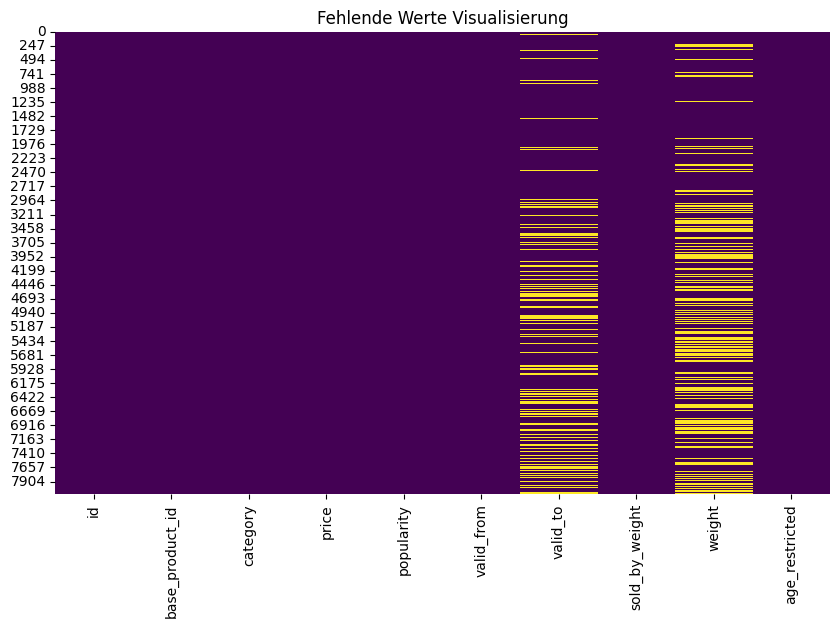

In [ ]:
# Visualisierung fehlender Werte
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Fehlende Werte Visualisierung')
plt.show()

Deskriptive Statistiken

In [ ]:
# Numerische Spalten
num_cols = ['price', 'popularity', 'weight']
display(df[num_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
price,8120.0,6.705783,19.499932,1.900000e-01,1.790000,3.390000,8.490000,589.490000
popularity,8120.0,0.092119,0.056088,1.254813e-52,0.036610,0.101526,0.139815,0.192543
weight,5615.0,0.989429,0.854266,1.000000e-01,0.449525,0.750000,1.300000,7.847513


In [ ]:
# Kategorische Spalten
cat_cols = ['category', 'sold_by_weight', 'age_restricted']
display(df[cat_cols].describe(include=['object']).T)

,count,unique,top,freq
category,8120,14,FRUITS_VEGETABLES,2155


Verteilungsanalyse

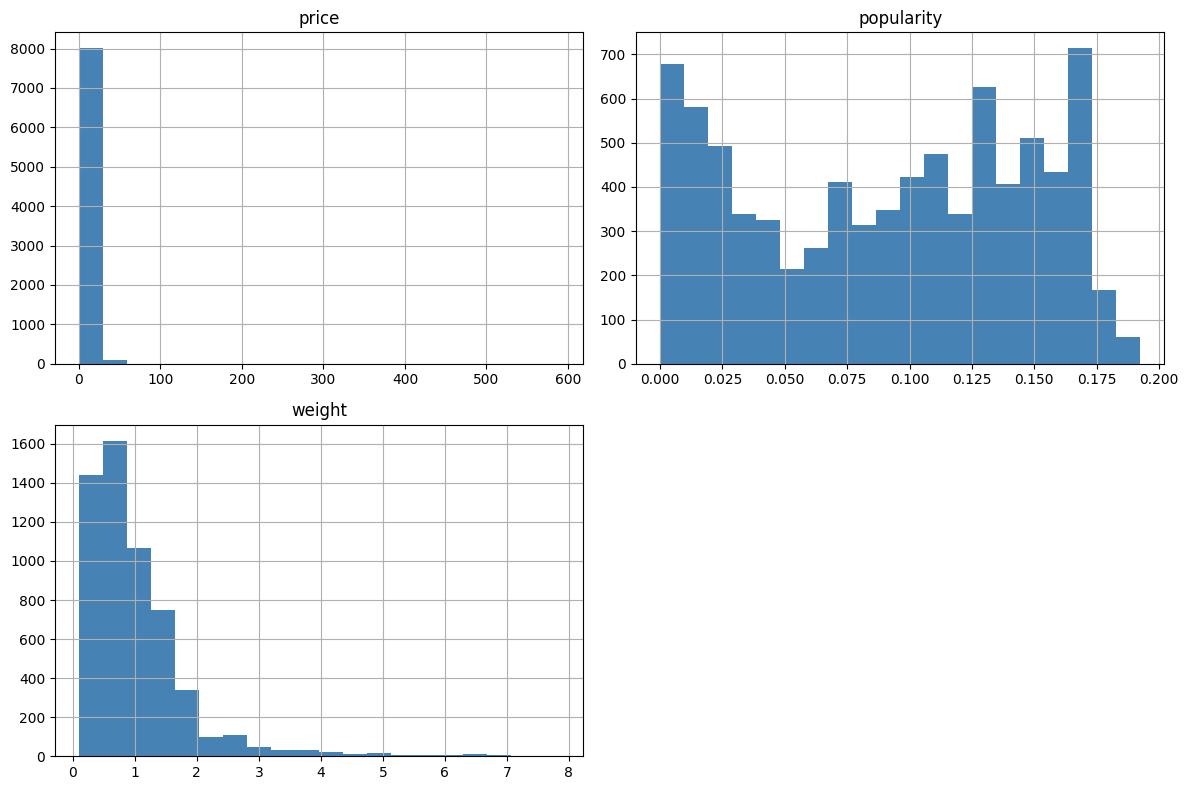

In [ ]:
# Histogramme für numerische Spalten
df[num_cols].hist(figsize=(12, 8), bins=20, color='steelblue')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

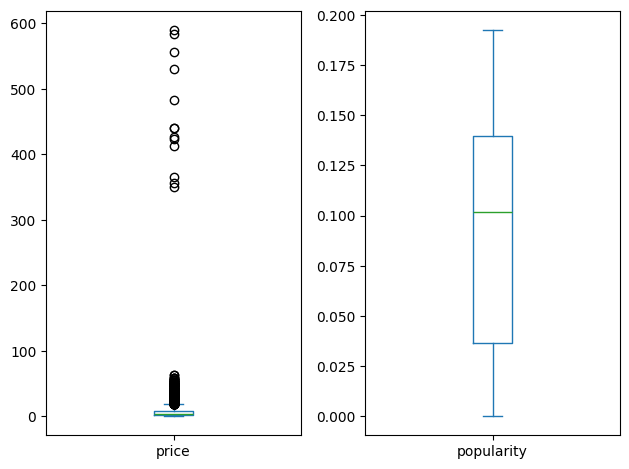

In [ ]:
# Boxplots für Preise und Popularität
plt.figure(figsize=(10, 6))
df[['price', 'popularity']].plot(kind='box', subplots=True, layout=(1,2))
plt.tight_layout()
plt.show()


Kategorische Variablen Analyse

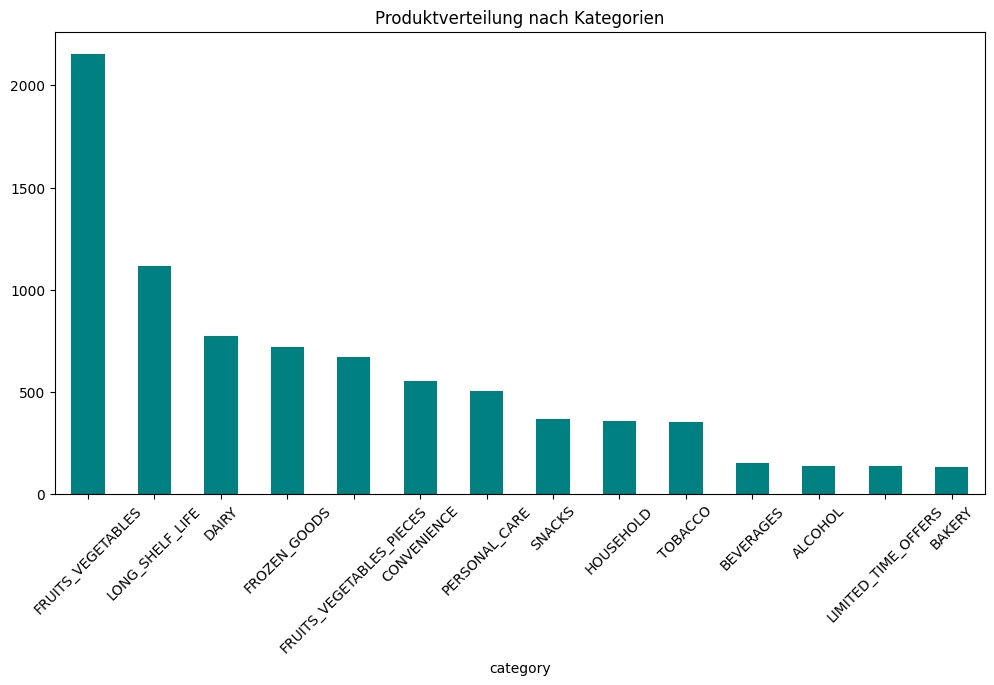

In [ ]:
# Kategorienanalyse
plt.figure(figsize=(12, 6))
df['category'].value_counts().plot(kind='bar', color='teal')
plt.title('Produktverteilung nach Kategorien')
plt.xticks(rotation=45)
plt.show()


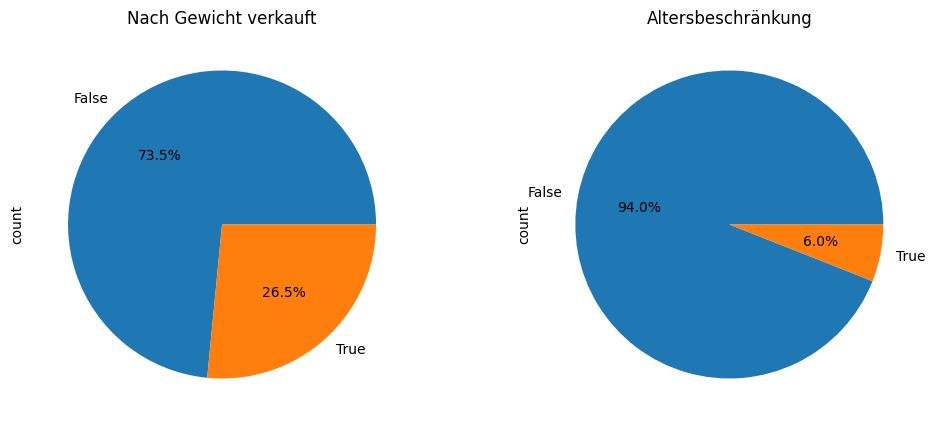

In [ ]:
# Boolesche Variablen
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
df['sold_by_weight'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[0])
df['age_restricted'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[1])
ax[0].set_title('Nach Gewicht verkauft')
ax[1].set_title('Altersbeschränkung')
plt.show()

## Preisanalyse


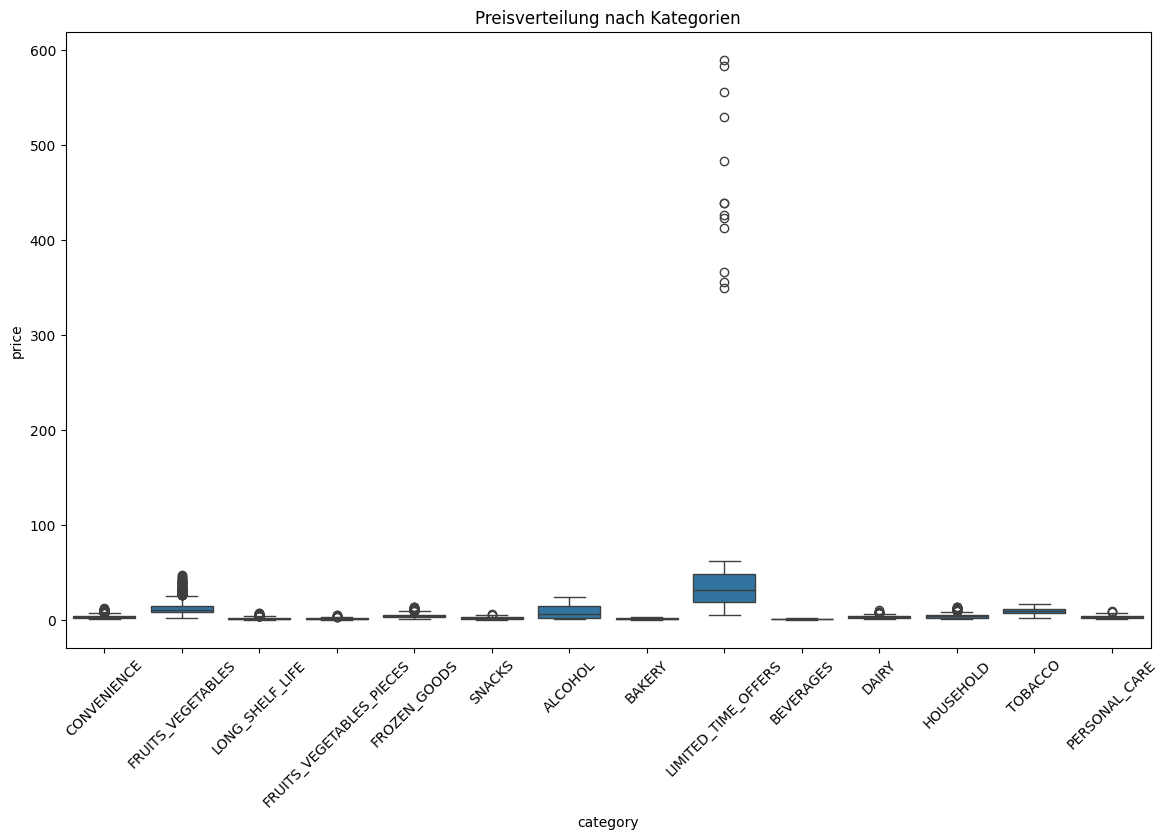

In [ ]:
# Preisverteilung nach Kategorien
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='category', y='price')
plt.xticks(rotation=45)
plt.title('Preisverteilung nach Kategorien')
plt.show()

In [ ]:
# Top 10 teuerste Produkte
display(df.nlargest(10, 'price')[['base_product_id', 'category', 'price']])

,base_product_id,category,price
1801,f2353db8-2b5f-46f1-97c4-2cc311f71cfd,LIMITED_TIME_OFFERS,589.49
344,d3845b3a-7a41-48fd-b547-c1167e3e713b,LIMITED_TIME_OFFERS,582.79
1064,b59abf32-f0b2-4a88-b35d-41f9c16c223a,LIMITED_TIME_OFFERS,556.00
1454,4f7c73b6-fca7-4f7d-8e38-9aa058e19a8d,LIMITED_TIME_OFFERS,529.39
2494,e79044b7-7842-4ba9-ba86-99d5c44552e7,LIMITED_TIME_OFFERS,482.79
684,7887c06a-ad84-4800-b066-ed02af4b579a,LIMITED_TIME_OFFERS,439.29
1145,bbd1c796-d4f0-4e3e-8d95-38d2679a1789,LIMITED_TIME_OFFERS,439.29
857,565c0e01-bd73-4f48-9605-f2b14ba496ad,LIMITED_TIME_OFFERS,425.99
2929,1b03cb66-ee17-4ce1-b997-736455cd7fdf,LIMITED_TIME_OFFERS,422.49
2905,e8ca76df-af2b-4cc1-8cd9-1e25087db9a7,LIMITED_TIME_OFFERS,412.49


In [ ]:
# Gültigkeitszeiträume analysieren
df['valid_from'] = pd.to_datetime(df['valid_from'])
df['valid_to'] = pd.to_datetime(df['valid_to'])
df['validity_days'] = (df['valid_to'] - df['valid_from']).dt.days

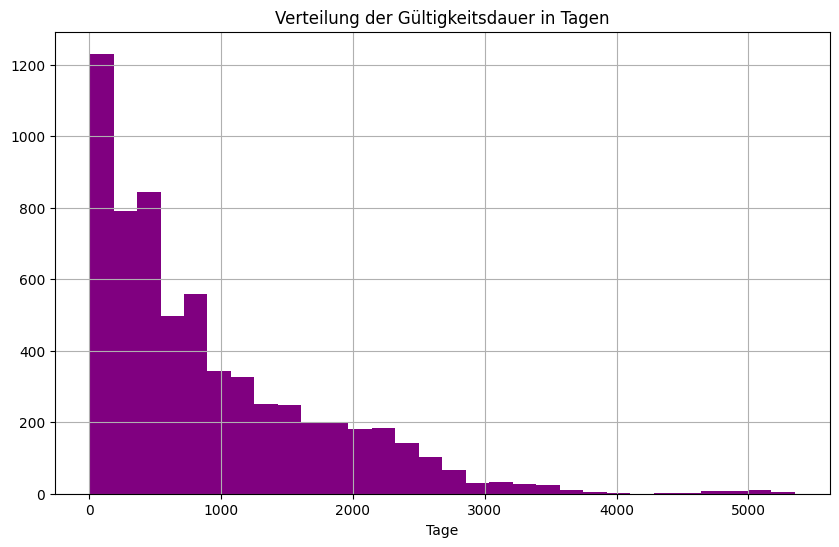

In [ ]:
# Gültigkeitsdauer
plt.figure(figsize=(10, 6))
df['validity_days'].hist(bins=30, color='purple')
plt.title('Verteilung der Gültigkeitsdauer in Tagen')
plt.xlabel('Tage')
plt.show()

/var/folders/nk/jy2j9nbj137d0klkt1lyfbfw0000gn/T/ipykernel_90745/3101789659.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M')['base_product_id'].count().plot(figsize=(12, 6))


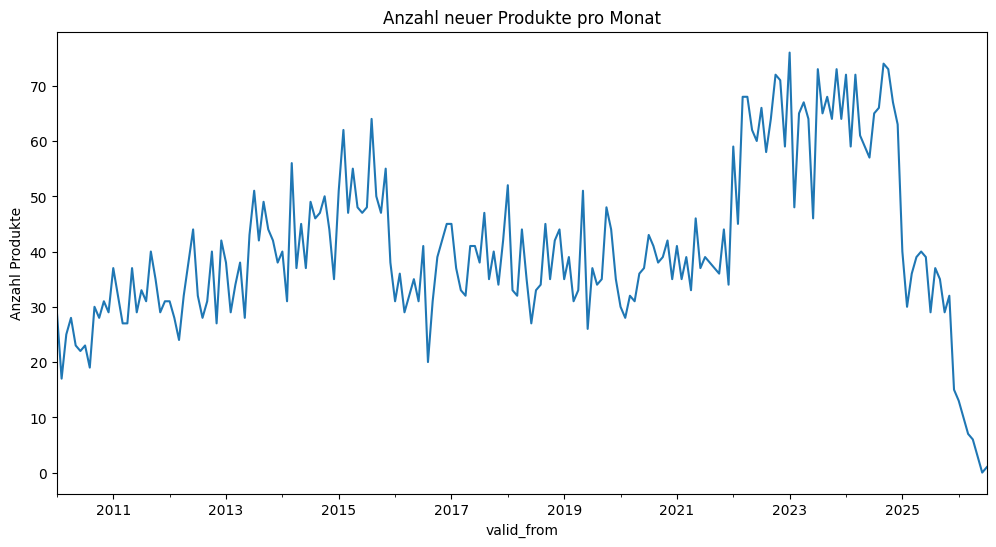

In [ ]:
# Produkteinführungen über die Zeit
df.set_index('valid_from', inplace=True)
df.resample('M')['base_product_id'].count().plot(figsize=(12, 6))
plt.title('Anzahl neuer Produkte pro Monat')
plt.ylabel('Anzahl Produkte')
plt.show()
df.reset_index(inplace=True)


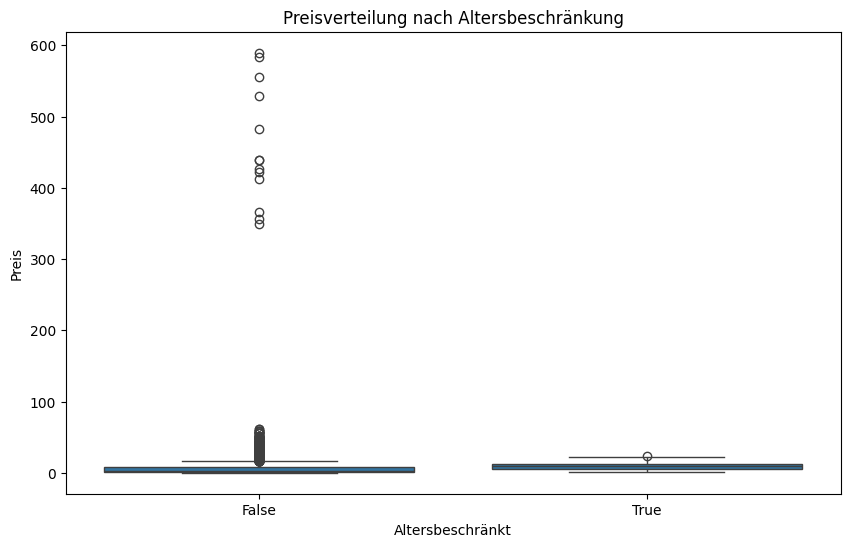

In [ ]:
# Preisverteilung nach Altersbeschränkung
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age_restricted', y='price')
plt.title('Preisverteilung nach Altersbeschränkung')
plt.xlabel('Altersbeschränkt')
plt.ylabel('Preis')
plt.show()

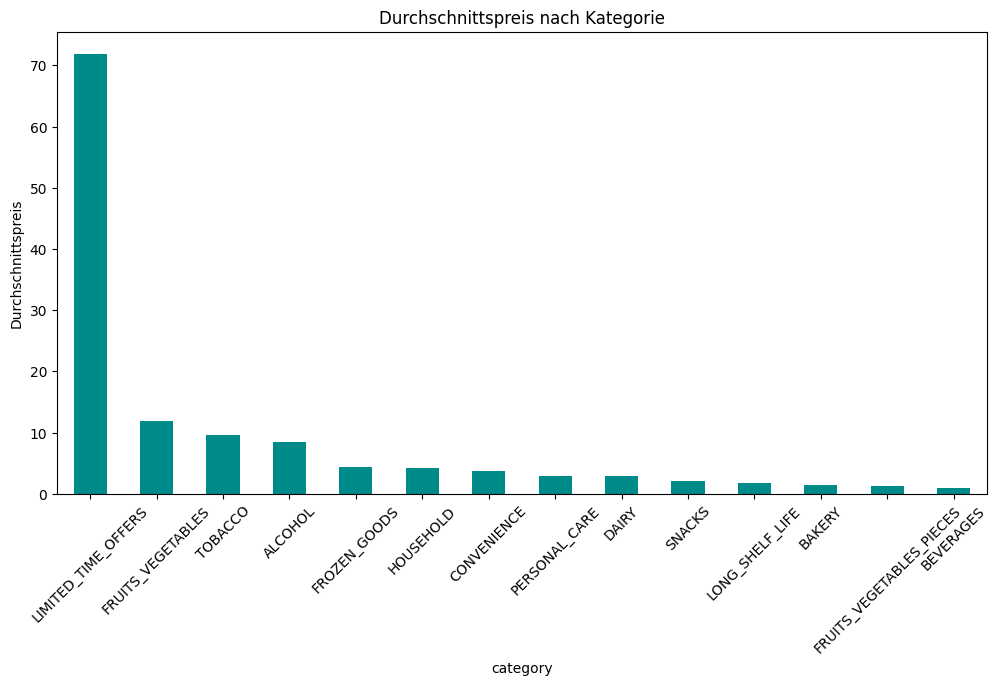

In [ ]:
# Durchschnittspreis pro Kategorie
avg_price = df.groupby('category')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_price.plot(kind='bar', color='darkcyan')
plt.title('Durchschnittspreis nach Kategorie')
plt.ylabel('Durchschnittspreis')
plt.xticks(rotation=45)
plt.show()



## Korrelationen und Beziehungen


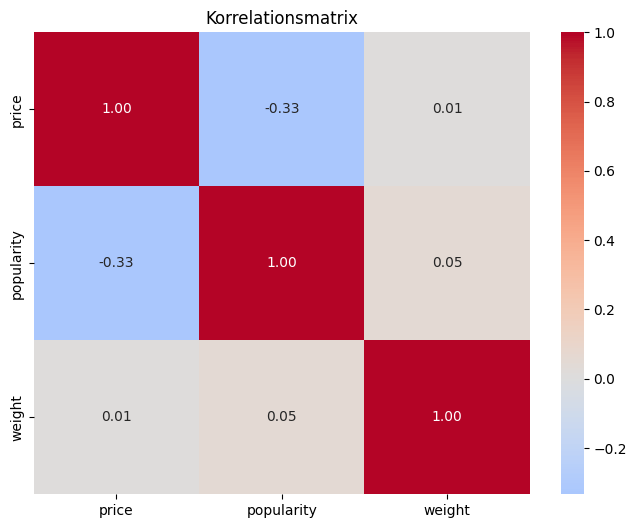

In [ ]:
# Korrelation zwischen Preis, Popularität und Gewicht
corr = df[['price', 'popularity', 'weight']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Korrelationsmatrix')
plt.show()

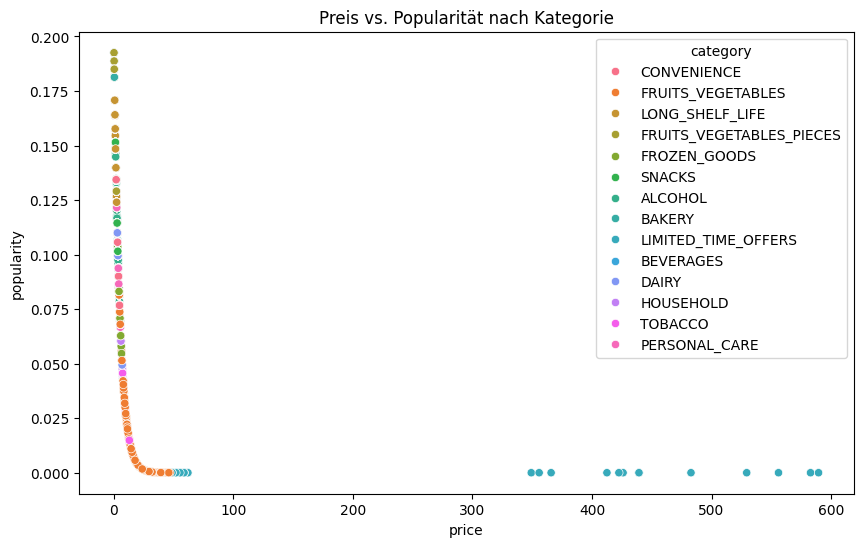

In [ ]:
# Preis vs. Popularität
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='popularity', hue='category')
plt.title('Preis vs. Popularität nach Kategorie')
plt.show()

## Gewichtsanalyse

In [ ]:
# Nur Produkte die nach Gewicht verkauft werden
weight_products = df[df['sold_by_weight'] == 'yes']

if not weight_products.empty:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=weight_products, x='weight', y='price', hue='category')
    plt.title('Gewicht vs. Preis für nach Gewicht verkaufte Produkte')
    plt.show()
else:
    print("Keine Produkte die nach Gewicht verkauft werden")

Keine Produkte die nach Gewicht verkauft werden


## Popularitätsanalyse


In [ ]:
# Top 10 populärste Produkte
top_popular = df.nlargest(10, 'popularity')[['base_product_id', 'category', 'price', 'popularity']]
display(top_popular)

,base_product_id,category,price,popularity
98,38b0cb18-aa2a-4a8d-8d86-7b2db70169a7,BEVERAGES,0.19,0.192543
461,29d506a0-5b54-4bb8-92e8-79e24febd177,BEVERAGES,0.19,0.192543
2638,00b09e80-a100-450a-b32a-fc91be7b635d,FRUITS_VEGETABLES_PIECES,0.19,0.192543
17,37c57f04-3273-4e7c-9bb7-f956e7d987b6,FRUITS_VEGETABLES_PIECES,0.29,0.188730
72,39712f22-008c-4aff-bc9e-f353d82b30dc,FRUITS_VEGETABLES_PIECES,0.29,0.188730
306,413afc83-1903-4984-ab10-4fc02e4182fc,BEVERAGES,0.29,0.188730
329,d2635cf6-7255-4f5d-b0bf-692006932060,LONG_SHELF_LIFE,0.29,0.188730
532,e238b32a-cc25-4309-8633-74a0de001362,LONG_SHELF_LIFE,0.29,0.188730
588,288046a1-48d9-4c58-a642-59f1b374ec80,LONG_SHELF_LIFE,0.29,0.188730
909,57f7058a-21d8-4ace-b884-d65c945470cc,BEVERAGES,0.29,0.188730


<Figure size 1200x800 with 0 Axes>

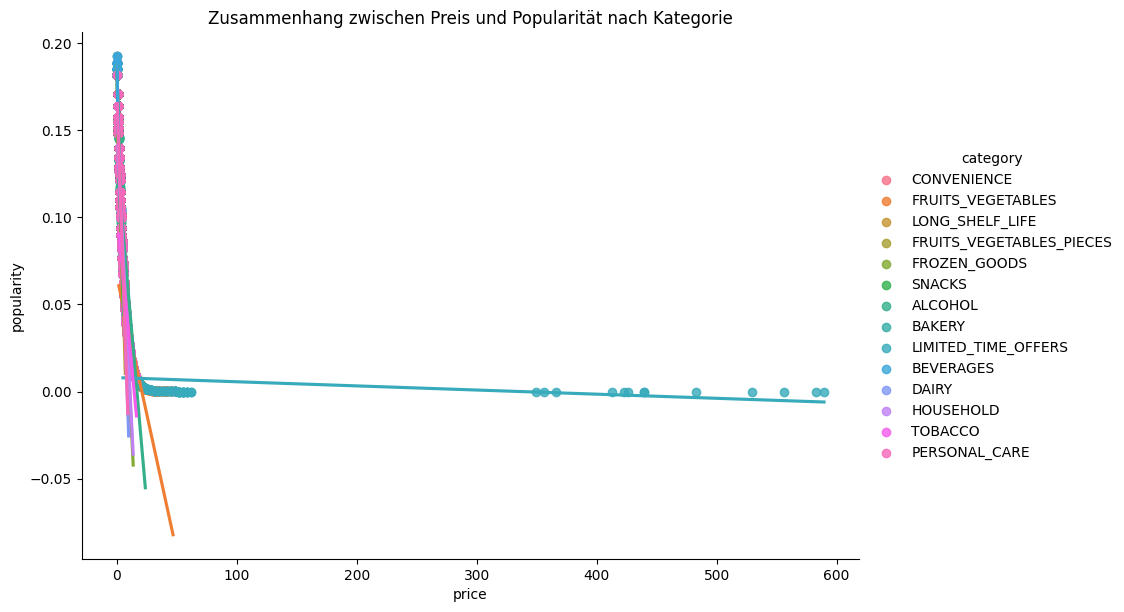

In [ ]:
# Zusammenhang zwischen Preis und Popularität nach Kategorie
plt.figure(figsize=(12, 8))
sns.lmplot(data=df, x='price', y='popularity', hue='category', 
           height=6, aspect=1.5, ci=None)
plt.title('Zusammenhang zwischen Preis und Popularität nach Kategorie')
plt.show()


## Zeitliche Analyse der Produkteinführungen


In [ ]:
# Produkteinführungen pro Jahr/Monat
df['year'] = df['valid_from'].dt.year
df['month'] = df['valid_from'].dt.month

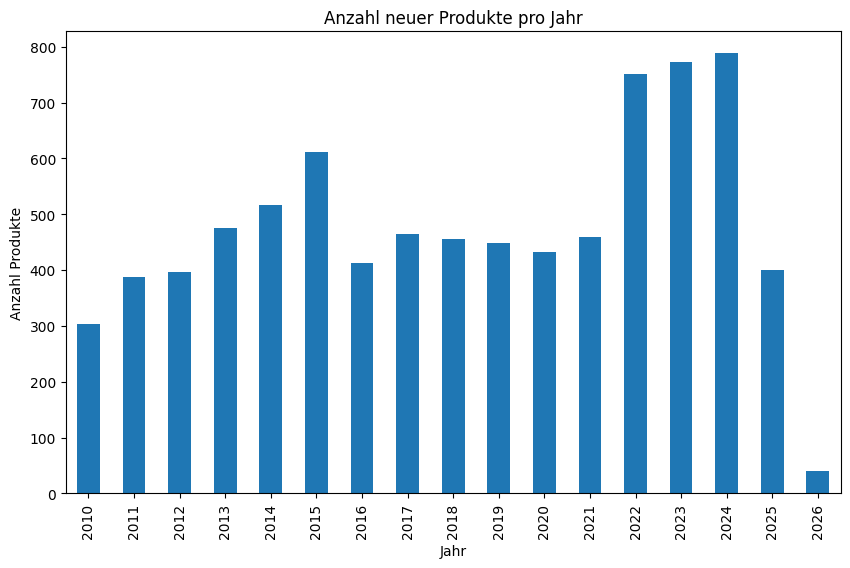

In [ ]:
# Produkteinführungen pro Jahr
plt.figure(figsize=(10, 6))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Anzahl neuer Produkte pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anzahl Produkte')
plt.show()

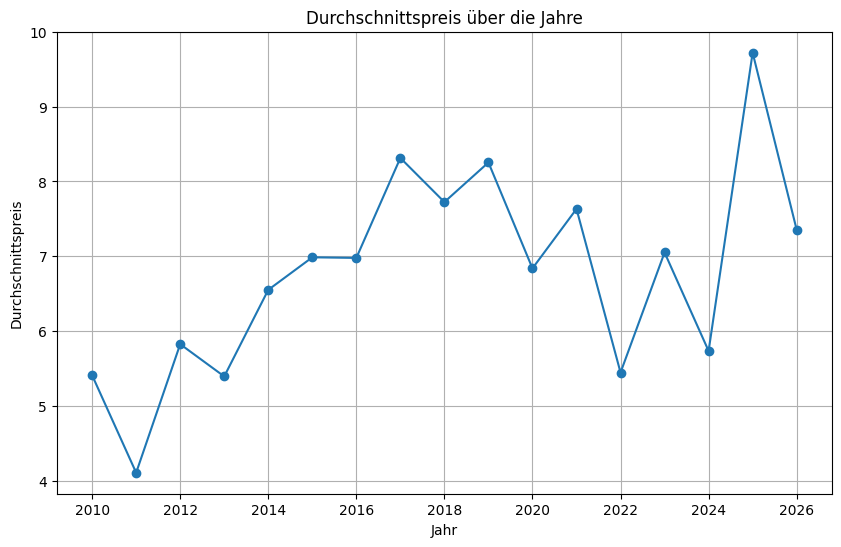

In [ ]:
# Durchschnittspreis über die Jahre
plt.figure(figsize=(10, 6))
df.groupby('year')['price'].mean().plot(marker='o')
plt.title('Durchschnittspreis über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittspreis')
plt.grid(True)
plt.show()

## Kategorie-spezifische Analysen


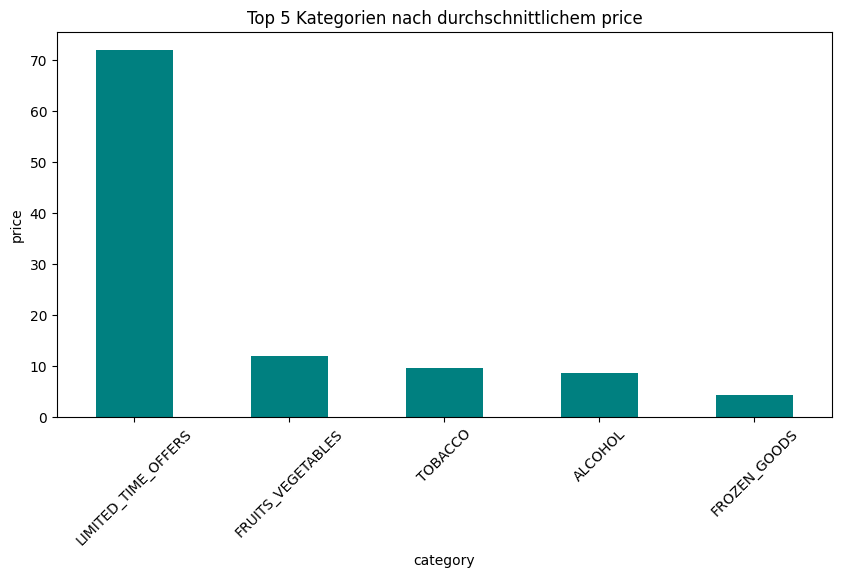

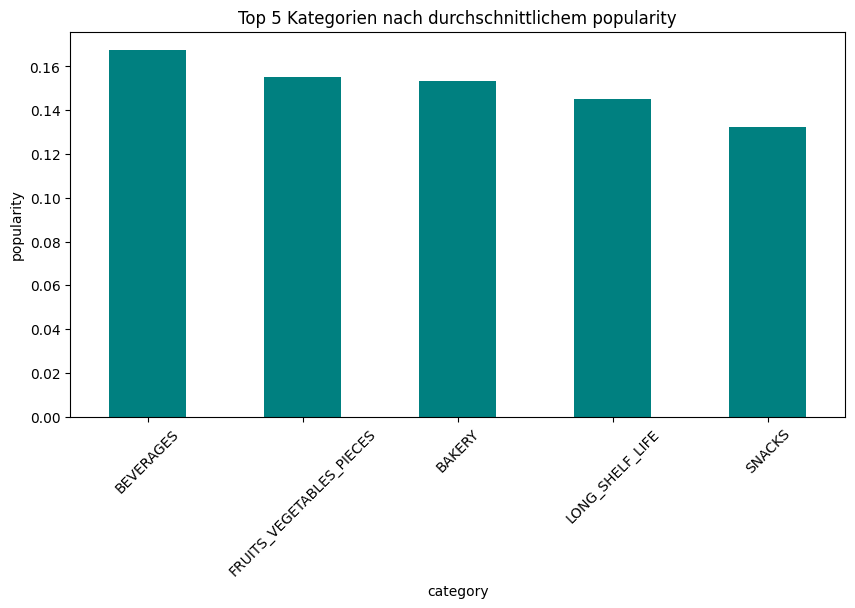

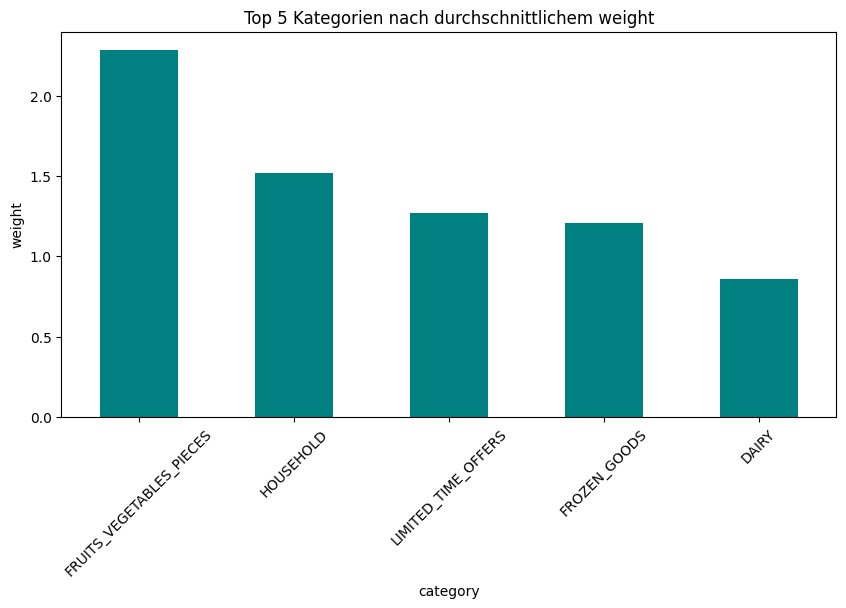

In [ ]:
# Top Kategorien nach verschiedenen Metriken
metrics = ['price', 'popularity', 'weight']
for metric in metrics:
    top_cats = df.groupby('category')[metric].mean().nlargest(5)
    plt.figure(figsize=(10, 5))
    top_cats.plot(kind='bar', color='teal')
    plt.title(f'Top 5 Kategorien nach durchschnittlichem {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()

## Altersbeschränkungsanalyse


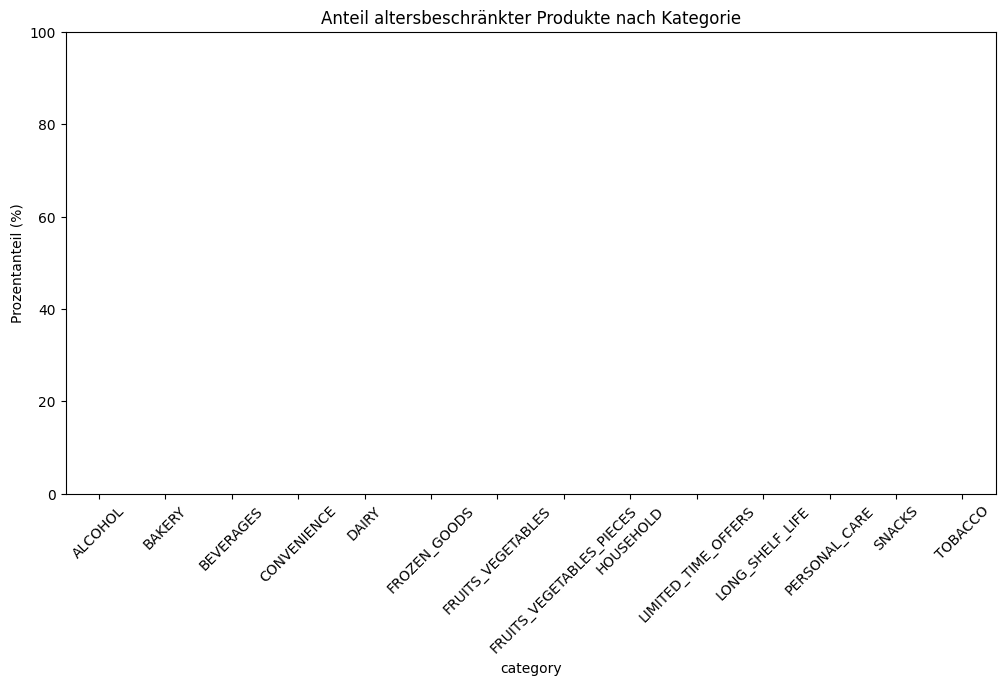

In [ ]:
# Anteil altersbeschränkter Produkte pro Kategorie
age_restricted_pct = df.groupby('category')['age_restricted'].apply(
    lambda x: (x == 'yes').mean() * 100).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
age_restricted_pct.plot(kind='bar', color='darkred')
plt.title('Anteil altersbeschränkter Produkte nach Kategorie')
plt.ylabel('Prozentanteil (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()

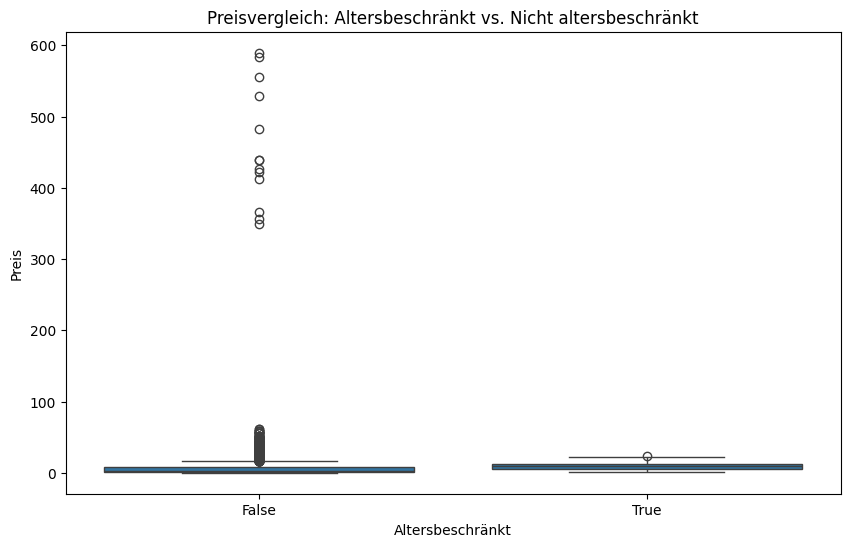

In [ ]:
# Preisvergleich altersbeschränkt vs. nicht altersbeschränkt
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age_restricted', y='price')
plt.title('Preisvergleich: Altersbeschränkt vs. Nicht altersbeschränkt')
plt.xlabel('Altersbeschränkt')
plt.ylabel('Preis')
plt.show()

## Gewichtsanalyse (für nach Gewicht verkaufte Produkte)


In [ ]:
# Sicherstellen, dass die benötigten Spalten existieren
required_cols = ['sold_by_weight', 'price', 'weight']
if all(col in df.columns for col in required_cols):
    
    # Produkte filtern, die nach Gewicht verkauft werden
    weight_products = df[df['sold_by_weight'].astype(str).str.lower().str.contains('yes|ja|1')].copy()
    
    if not weight_products.empty:
        # Preis pro Einheit berechnen
        weight_products['price_per_unit'] = weight_products['price'] / weight_products['weight']
        
        # Ergebnisse anzeigen
        print(f"Anzahl nach Gewicht verkaufter Produkte: {len(weight_products)}")
        display(weight_products[['base_product_id', 'category', 'price', 'weight', 'price_per_unit']].head())
        
        # 1. Histogramm der Preise pro Einheit
        plt.figure(figsize=(12, 6))
        sns.histplot(weight_products['price_per_unit'], bins=30, kde=True)
        plt.title('Verteilung des Preises pro Gewichtseinheit')
        plt.xlabel('Preis pro Einheit')
        plt.ylabel('Anzahl Produkte')
        plt.show()
        
        # 2. Top 10 teuerste Produkte pro Einheit
        top_expensive = weight_products.nlargest(10, 'price_per_unit')
        plt.figure(figsize=(12, 6))
        sns.barplot(data=top_expensive, x='base_product_id', y='price_per_unit', hue='category')
        plt.title('Top 10 teuerste Produkte pro Gewichtseinheit')
        plt.xlabel('Produkt ID')
        plt.ylabel('Preis pro Einheit')
        plt.xticks(rotation=45)
        plt.show()
        
        # 3. Gewicht vs. Preis
        plt.figure(figsize=(12, 6))
        sns.scatterplot(data=weight_products, x='weight', y='price', hue='category', size='price_per_unit')
        plt.title('Zusammenhang zwischen Gewicht und Preis')
        plt.xlabel('Gewicht')
        plt.ylabel('Preis')
        plt.show()
        
    else:
        print("Keine Produkte gefunden, die nach Gewicht verkauft werden")
else:
    print("Erforderliche Spalten fehlen im Datensatz")

Keine Produkte gefunden, die nach Gewicht verkauft werden


In [ ]:
# Verteilung von pieces_or_weight und sales_price plotten
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df['pieces_or_weight'], bins=50, ax=axes[0])
axes[0].set_title("Verteilung: Pieces or Weight")

sns.histplot(df['sales_price'], bins=50, ax=axes[1])
axes[1].set_title("Verteilung: Sales Price")

plt.show()

NameError: name 'plt' is not defined